In [1]:
import torch
from torch import nn
from torch import optim
from torch.utils import data
from torchvision import datasets, transforms

import helper

In [2]:
# define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

# download and load training data
trainset = datasets.FashionMNIST('../input/', download=True, train=True, transform=transform)
trainloader = data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('../input/', download=True, train=False, transform=transform)
testloader = data.DataLoader(testset, batch_size=64, shuffle=True)

<AxesSubplot:>

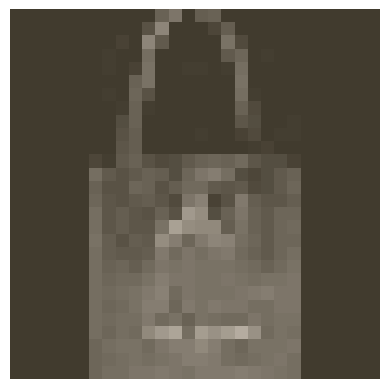

In [3]:
image, label = next(iter(trainloader))
helper.imshow(image[0, :])

In [4]:
model = nn.Sequential(
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Linear(256, 32),
    nn.ReLU(),
    nn.Linear(32, 10),
    nn.LogSoftmax(dim=1)
)

In [5]:
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [6]:
# train model
epoch = 20
for e in range(epoch):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        loss = loss.item()
        
        running_loss += loss
    else:
        print('Training loss:', running_loss/len(trainloader))

Training loss: 1.0098332892984216
Training loss: 0.5498946072545641
Training loss: 0.48418648409119036
Training loss: 0.45076428681040115
Training loss: 0.4278225108409233
Training loss: 0.4100314904409431
Training loss: 0.3950406379028678
Training loss: 0.38272087743033223
Training loss: 0.3718882199766031
Training loss: 0.361006713236001
Training loss: 0.352516915871581
Training loss: 0.3439458970194941
Training loss: 0.3366715439569467
Training loss: 0.32960452549238956
Training loss: 0.3231039622079716
Training loss: 0.3161953417445297
Training loss: 0.3105108131732005
Training loss: 0.30476100268616857
Training loss: 0.2997248567450148
Training loss: 0.2942038845898373


In [7]:
model

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

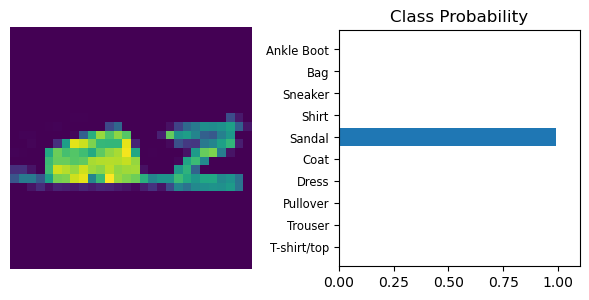

In [8]:
images, labels = next(iter(testloader))
img = images[0]
img = img.view(1, 784)

with torch.no_grad():
    logps = model(img)
    
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')